In [8]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt

In [2]:
from utils.train_mimic import run_mimic_experiments

# MIMIC-III: forecasting white blood cell count

In [14]:
mimic_results = run_mimic_experiments(retrain=True)

Training CPRNN
Epoch: 0	Train loss: 158.37157385689872
Epoch: 50	Train loss: 50.88561725616455
Epoch: 100	Train loss: 54.290787151881624
Epoch: 150	Train loss: 50.80563054765974
Epoch: 200	Train loss: 57.097449847630095
Epoch: 250	Train loss: 50.70339856828962
Epoch: 300	Train loss: 51.36100387573242
Epoch: 350	Train loss: 50.46761431012835
Epoch: 400	Train loss: 54.56309863499233
Epoch: 450	Train loss: 50.349569865635466
Epoch: 500	Train loss: 52.914791107177734
Epoch: 550	Train loss: 50.52208941323416
Epoch: 600	Train loss: 53.666399410792756
Epoch: 650	Train loss: 51.18830612727574
Epoch: 700	Train loss: 50.823435238429475
Epoch: 750	Train loss: 51.00881712777274
Epoch: 800	Train loss: 66.29941749572754
Epoch: 850	Train loss: 50.88368511199951
Epoch: 900	Train loss: 51.778152874537874
Epoch: 950	Train loss: 52.10406616755894
Training QRNN
Epoch:  0 | train loss: 11.2706
Epoch:  0 | train loss: 3.1549
Epoch:  0 | train loss: 1.8760
Epoch:  0 | train loss: 1.3015
Epoch:  0 | train los

In [11]:
import numpy as np

In [131]:
mimic_results['CPRNN']['mean_coverage']

0.9340000152587891

In [132]:
mimic_results['CPRNN']['interval_widths']

[22.145597457885742, 22.235078811645508]

In [133]:
mimic_results['DPRNN']['Coverage']

0.022

In [134]:
mimic_results['DPRNN']['CI length']

0.25100785

In [135]:
ci = mimic_results['DPRNN']['Confidence intervals']
np.mean(ci, axis=0).flatten()

array([0.24011813, 0.26189747], dtype=float32)

In [136]:
mimic_results['QRNN']['Coverage']

0.9175

In [137]:
mimic_results['QRNN']['CI length']

11.464559

In [138]:
ci = mimic_results['QRNN']['Confidence intervals']
np.mean(ci, axis=0).flatten()

array([11.149874, 11.779233], dtype=float32)

# EEG dataset: forecasting EEG signals
Signals come from different distributions. Patients are shown different combinations of stimuli, and the recordings are taken from different parts of the brain.

Split 896 training instances to 600 / 296 true training/calibration.

(if using control data only, then 448 = 300 + 148)

Downsample training sequences to 50 steps
* 40 steps input, 10 prediction

In [26]:
from utils.eeg_data_processing import get_raw_eeg_data
data = get_raw_eeg_data(cached=True, split='train')

In [45]:
from scipy.signal import resample

In [29]:
len(data)

19200

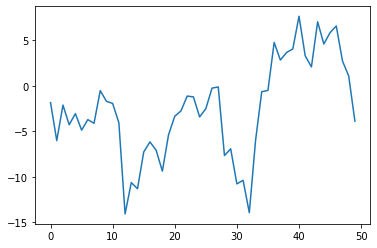

In [117]:
i = np.random.randint(19200)
plt.plot(data_resampled[i])

In [94]:
len(data)

0

In [96]:
b'0'

"b'0'"

In [105]:
import os
import pathlib
import gzip

In [110]:
def parse_eeg_file(filename):
    with gzip.open(filename, 'rb') as f:
        chans = {}
        for line in f:
            tokens = line.decode('ascii').split()
            print(tokens[0])
            if tokens[0] != '#':
                print('here')
                if tokens[1] not in chans.keys():
                    chans[tokens[1]] = []
                chans[tokens[1]].append(float(tokens[3]))
            break
        chan_arrays = []
        for chan in chans.values():
            chan_arrays.append(chan)
    return chan_arrays

root = 'data/eeg/SMNI_CMI_TRAIN'

dataset = []
for folder in os.listdir(root):
    if folder != 'README' and (False or folder[3] == 'c'):
        subfolder = os.path.join(root, folder)
        for filename in os.listdir(subfolder):
            f = os.path.join(subfolder, filename)
            print(f)
            if '.gz' in pathlib.Path(f).suffixes:
                chan_arrays = parse_eeg_file(f)
                dataset.extend(chan_arrays)
                break

data/eeg/SMNI_CMI_TRAIN/co2c0000344/co2c0000344.rd.071.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.001.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000345/co2c0000345.rd.014.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000340/co2c0000340.rd.007.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.059.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000346/co2c0000346.rd.026.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000341/co2c0000341.rd.019.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000337/co2c0000337.rd.027.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.035.gz
#
data/eeg/SMNI_CMI_TRAIN/co2c0000338/co2c0000338.rd.035.gz
#


In [122]:
X_train = data_resampled

calibration_idx = np.random.choice(len(X_train), replace=False,
                                           size=int(0.2 * len(X_train)))
train_idx = np.setdiff1d(range(len(X_train)), calibration_idx)

In [123]:
calibration_idx

array([ 7668, 14526, 11465, ...,   883,  7084, 18803])

In [126]:
import torch

In [1]:
from utils.train_mimic import run_medical_experiments
results = run_medical_experiments(retrain=True, dataset='eeg', baselines=['DPRNN'])

Training DPRNN
{'epochs': 10, 'batch_size': 150, 'embedding_size': 20, 'coverage': 0.9, 'lr': 0.01, 'n_steps': 1000, 'input_size': 1, 'max_steps': 40, 'output_size': 10}
Epoch:  0 | train loss: 126.6505
Epoch:  0 | train loss: 321.6871
Epoch:  0 | train loss: 60.9047
Epoch:  0 | train loss: 76.5769
Epoch:  0 | train loss: 52.3232
Epoch:  0 | train loss: 77.4224
Epoch:  0 | train loss: 55.4997
Epoch:  0 | train loss: 143.3620
Epoch:  0 | train loss: 66.8440
Epoch:  0 | train loss: 80.3922
Epoch:  0 | train loss: 71.8597
Epoch:  0 | train loss: 63.4919
Epoch:  0 | train loss: 83.7669
Epoch:  0 | train loss: 217.4729
Epoch:  0 | train loss: 123.6347
Epoch:  0 | train loss: 142.7558
Epoch:  0 | train loss: 218.5715
Epoch:  0 | train loss: 285.6799
Epoch:  0 | train loss: 110.2929
Epoch:  0 | train loss: 81.6428
Epoch:  1 | train loss: 49.6919
Epoch:  1 | train loss: 130.6322
Epoch:  1 | train loss: 115.0878
Epoch:  1 | train loss: 132.6172
Epoch:  1 | train loss: 56.4864
Epoch:  1 | train 

In [13]:
from utils.train_mimic import run_medical_experiments
results = run_medical_experiments(dataset='eeg')

here


In [15]:
results['CPRNN']['mean_coverage']

0.9716145992279053

In [23]:
np.mean(results['CPRNN']['interval_widths']), np.std(results['CPRNN']['interval_widths'])

(66.30071601867675, 13.065296320516955)

In [17]:
results['DPRNN']['Coverage']

0.4481880208333333

In [18]:
results['DPRNN']['CI length']

8.05982

In [24]:
import numpy as np
ci = results['DPRNN']['Confidence intervals']
np.mean(np.mean(ci, axis=0).flatten()), np.mean(np.std(ci, axis=0).flatten())

(8.0598135, 6.8367715)

In [20]:
results['QRNN']['Coverage']

0.8731104166666667

In [21]:
results['QRNN']['CI length']

21.264711

In [25]:
ci = results['QRNN']['Confidence intervals']
np.mean(np.mean(ci, axis=0).flatten()), np.mean(np.std(ci, axis=0).flatten())

(21.264704, 11.7837)

In [33]:
from utils.mimic_data_processing import process_mimic_data

In [34]:
X, Y, L = process_mimic_data()

In [35]:
len(X)

4323

In [37]:
np.mean(L), np.std(L)

(10.554244737450844, 7.011804421918092)

In [40]:
np.min(L)

5